# Projet Probabilité et Statistique L3 Sciences du Numérique

**Auteurs :**
- Stievenard Emma
- Szewczyk Clément

# Introduction

In [100]:
#Préparation des données
import pandas as pd

# Charger le fichier CSV avec l'encodage spécifié
file_path = "data/data2022.csv"  
df = pd.read_csv(file_path, encoding='latin-1', sep=';')  


In [101]:
# Afficher les premières lignes pour inspecter les données
print(df.head())

   Année           Zone                      Région Numéro       Département  \
0   2022            Sud  Provence-Alpes-Côte d'Azur   BMPM  Bouches-du-Rhône   
1   2022  Île-de-France               Île-de-France   BSPP             Paris   
2   2022        Sud-est        Auvergne-Rhône-Alpes      1               Ain   
3   2022           Nord             Hauts-de-France      2             Aisne   
4   2022        Sud-est        Auvergne-Rhône-Alpes      3            Allier   

  Catégorie A Feux d'habitations-bureaux  dont feux de cheminées  \
0         NaN                        756                    10.0   
1         NaN                      3 708                    29.0   
2           B                        524                   211.0   
3           B                        954                   329.0   
4           C                        449                   223.0   

   Feux d'ERP avec local à sommeil  Feux d'ERP sans local à sommeil  ...  \
0                             44.0

In [102]:
# Afficher les colonnes disponibles
print(df.columns)

Index(['Année', 'Zone', 'Région', 'Numéro', 'Département', 'Catégorie A',
       'Feux d'habitations-bureaux', 'dont feux de cheminées',
       'Feux d'ERP avec local à sommeil', 'Feux d'ERP sans local à sommeil',
       'Feux de locaux industriels', 'Feux de locaux artisanaux',
       'Feux de locaux agricoles', 'Feux sur voie publique',
       'Feux de véhicules', 'Feux de végétations', 'Autres feux', 'Incendies',
       'Accidents sur lieux de travail', 'Accidents à domicile',
       'Accidents de sport', 'Accidents sur voie publique',
       'Secours en montagne', 'Malaises sur lieux de travail',
       'Malaises à domicile : urgence vitale', 'Malaises à domicile : carence',
       'Malaises en sport', 'Malaises sur voie publique', 'Autolyses',
       'Secours en piscines ou eaux intérieures', 'Secours en mer (FDSM)',
       'Intoxications', 'dont intoxications au CO', 'Autres SAV',
       'Secours à victime', 'Relevage de personnes', 'Recherche de personnes',
       'Aides à perso

In [103]:
# Affiche les différents élement de la colonne Année
print(df['Année'].unique())


[2022]


In [104]:
# Affiche les différentes "Zone"
df_zone = df["Zone"]
print(df_zone.unique())

['Sud' 'Île-de-France' 'Sud-est' 'Nord' 'Est' 'Ouest' 'Sud-ouest'
 'Antilles' 'Guyane' 'Océan indien']


In [105]:
# Les régions

print(df["Région"].unique())

["Provence-Alpes-Côte d'Azur" 'Île-de-France' 'Auvergne-Rhône-Alpes'
 'Hauts-de-France' 'Grand Est' 'Occitanie' 'Normandie'
 'Nouvelle-Aquitaine' 'Centre-Val de Loire' 'Bourgogne-Franche-Comté'
 'Bretagne' 'Corse' 'Pays de la Loire' 'Guadeloupe' 'Martinique' 'Guyane'
 'La Réunion' 'Mayotte']


In [106]:
# Les départements
print(df["Département"].unique())

['Bouches-du-Rhône' 'Paris' 'Ain' 'Aisne' 'Allier'
 'Alpes-de-Haute-Provence' 'Hautes-Alpes' 'Alpes-Maritimes' 'Ardèche'
 'Ardennes' 'Ariège' 'Aube' 'Aude' 'Aveyron' 'Calvados' 'Cantal'
 'Charente' 'Charente-Maritime' 'Cher' 'Corrèze' "Côte-d'Or"
 "Côtes-d'Armor" 'Creuse' 'Dordogne' 'Doubs' 'Drôme' 'Eure' 'Eure-et-Loir'
 'Finistère' 'Corse-du-Sud' 'Haute-Corse' 'Gard' 'Haute-Garonne' 'Gers'
 'Gironde' 'Hérault' 'Ille-et-Vilaine' 'Indre' 'Indre-et-Loire' 'Isère'
 'Jura' 'Landes' 'Loir-et-Cher' 'Loire' 'Haute-Loire' 'Loire-Atlantique'
 'Loiret' 'Lot' 'Lot-et-Garonne' 'Lozère' 'Maine-et-Loire' 'Manche'
 'Marne' 'Haute-Marne' 'Mayenne' 'Meurthe-et-Moselle' 'Meuse' 'Morbihan'
 'Moselle' 'Nièvre' 'Nord' 'Oise' 'Orne' 'Pas-de-Calais' 'Puy-de-Dôme'
 'Pyrénées-Atlantiques' 'Hautes-Pyrénées' 'Pyrénées-Orientales' 'Bas-Rhin'
 'Haut-Rhin' 'Rhône' 'Haute-Saône' 'Saône-et-Loire' 'Sarthe' 'Savoie'
 'Haute-Savoie' 'Seine-Maritime' 'Seine-et-Marne' 'Yvelines' 'Deux-Sèvres'
 'Somme' 'Tarn' 'Tarn-et-Garo

In [107]:
# Les types d'interventions

taille = len(df)

# afficher les colonnes de l'index 6 à taille
print(df.columns[6:taille])

Index(['Feux d'habitations-bureaux', 'dont feux de cheminées',
       'Feux d'ERP avec local à sommeil', 'Feux d'ERP sans local à sommeil',
       'Feux de locaux industriels', 'Feux de locaux artisanaux',
       'Feux de locaux agricoles', 'Feux sur voie publique',
       'Feux de véhicules', 'Feux de végétations', 'Autres feux', 'Incendies',
       'Accidents sur lieux de travail', 'Accidents à domicile',
       'Accidents de sport', 'Accidents sur voie publique',
       'Secours en montagne', 'Malaises sur lieux de travail',
       'Malaises à domicile : urgence vitale', 'Malaises à domicile : carence',
       'Malaises en sport', 'Malaises sur voie publique', 'Autolyses',
       'Secours en piscines ou eaux intérieures', 'Secours en mer (FDSM)',
       'Intoxications', 'dont intoxications au CO', 'Autres SAV',
       'Secours à victime', 'Relevage de personnes', 'Recherche de personnes',
       'Aides à personne', 'Secours à personne', 'Accidents routiers',
       'Accidents ferrov

In [108]:
# Total interventions


df["Total interventions"] = (
    df["Total interventions"]
    .replace(r"[^\d]", "", regex=True)  # Supprime tout sauf les chiffres
    .astype(int)  # Convertit en int pour les calculs
)

# Calcul de la somme des interventions
somme_totale = df["Total interventions"].sum()

print(f"La somme totale des interventions est : {somme_totale}")

La somme totale des interventions est : 4968481


In [109]:
# Nombre de colonnes et de lignes
print("Lignes:", len(df))
print("Colonnes:", len(df.columns))

Lignes: 99
Colonnes: 71


# Partie 1 : Analyse détaillé des interventions

In [110]:
# Top 5 interventions les plus courantes (diagramme circulaire)


In [111]:
# Top 5 de départements avec le plus d'interventions (diagramme circulaire)

In [112]:
# Histogramme des interventions par zone / régions

In [113]:
# Carte de france des interventions par département


In [114]:
# Moyenne des interventions par zone / régions

In [115]:
# Valeur médianes des interventions par zone / régions

# Partie 2 :Facteur Influençant les interventions

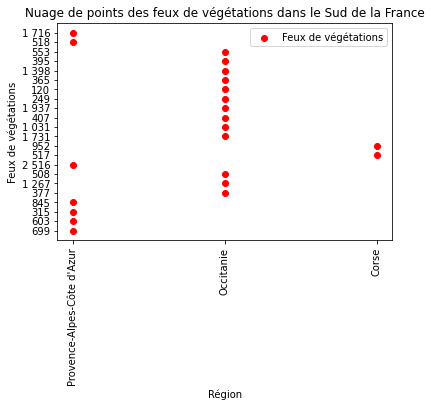

In [122]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrer les données pour la zone 'Sud'
df_sud = df[df['Zone'] == 'Sud']

# Extraire les colonnes 'Feux de végétations' et 'Région'
feux_vegetation = df_sud['Feux de végétations']
regions = df_sud['Région']

# Créer le nuage de points
plt.scatter(regions, feux_vegetation, color='red', label='Feux de végétations')

# Ajouter des labels et un titre
plt.xlabel('Région')
plt.ylabel('Feux de végétations')
plt.title('Nuage de points des feux de végétations dans le Sud de la France')
plt.legend()

# Rotation des labels de l'axe x pour une meilleure lisibilité
plt.xticks(rotation=90)

# Afficher le graphique
plt.show()

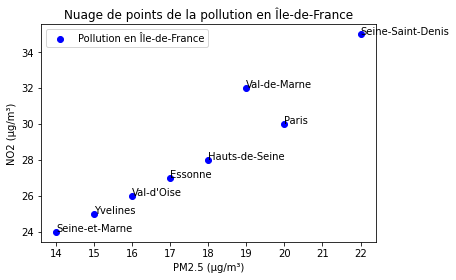

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Données fictives pour la pollution en Île-de-France
regions = ['Paris', 'Hauts-de-Seine', 'Seine-Saint-Denis', 'Val-de-Marne', 'Yvelines', 'Essonne', 'Val-d\'Oise', 'Seine-et-Marne']
pm25 = [20, 18, 22, 19, 15, 17, 16, 14]  # Niveaux de PM2.5
no2 = [30, 28, 35, 32, 25, 27, 26, 24]   # Niveaux de NO2

# Créer le nuage de points
plt.scatter(pm25, no2, color='blue', label='Pollution en Île-de-France')

# Ajouter des labels et un titre
plt.xlabel('PM2.5 (µg/m³)')
plt.ylabel('NO2 (µg/m³)')
plt.title('Nuage de points de la pollution en Île-de-France')
plt.legend()

# Ajouter des annotations pour les régions
for i, region in enumerate(regions):
    plt.annotate(region, (pm25[i], no2[i]))

# Afficher le graphique
plt.show()

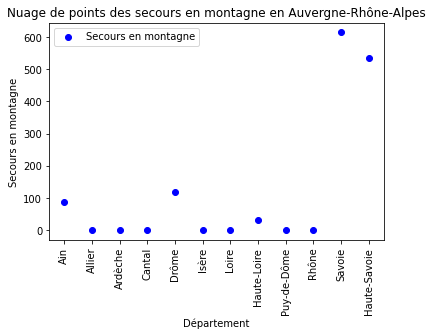

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrer les données pour la région Auvergne-Rhône-Alpes
df_auvergne_rhone_alpes = df[df['Région'] == 'Auvergne-Rhône-Alpes']

# Extraire les colonnes 'Secours en montagne' et 'Département'
secours_montagne = df_auvergne_rhone_alpes['Secours en montagne']
departements = df_auvergne_rhone_alpes['Département']

# Créer le nuage de points
plt.scatter(departements, secours_montagne, color='blue', label='Secours en montagne')

# Ajouter des labels et un titre
plt.xlabel('Département')
plt.ylabel('Secours en montagne')
plt.title('Nuage de points des secours en montagne en Auvergne-Rhône-Alpes')
plt.legend()

# Rotation des labels de l'axe x pour une meilleure lisibilité
plt.xticks(rotation=90)

# Afficher le graphique
plt.show()

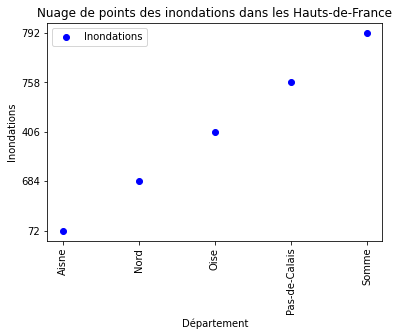

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrer les données pour la région Hauts-de-France
df_hauts_de_france = df[df['Région'] == 'Hauts-de-France']

# Extraire les colonnes 'Inondations' et 'Département'
inondations = df_hauts_de_france['Inondations']
departements = df_hauts_de_france['Département']

# Créer le nuage de points
plt.scatter(departements, inondations, color='blue', label='Inondations')

# Ajouter des labels et un titre
plt.xlabel('Département')
plt.ylabel('Inondations')
plt.title('Nuage de points des inondations dans les Hauts-de-France')
plt.legend()

# Rotation des labels de l'axe x pour une meilleure lisibilité
plt.xticks(rotation=90)

# Afficher le graphique
plt.show()

In [96]:
# Calcul probabilité des événement précédent probabilité que l'intervtion arrive dans la localisation